In [3]:
import numpy as np # Numerical data and algebra
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns # Also for statistical data visualisation and works with matpotlib
import plotly.graph_objects as go
import tensorflow as tf # Tensorflow offers the impementation of the Adam optimzing algorithm
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt # For creating visual plots to represent data
import random
import visualkeras # For visualising the tensorflow(Keras) architecture of the neural network

In [4]:
# Importing the mnist Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

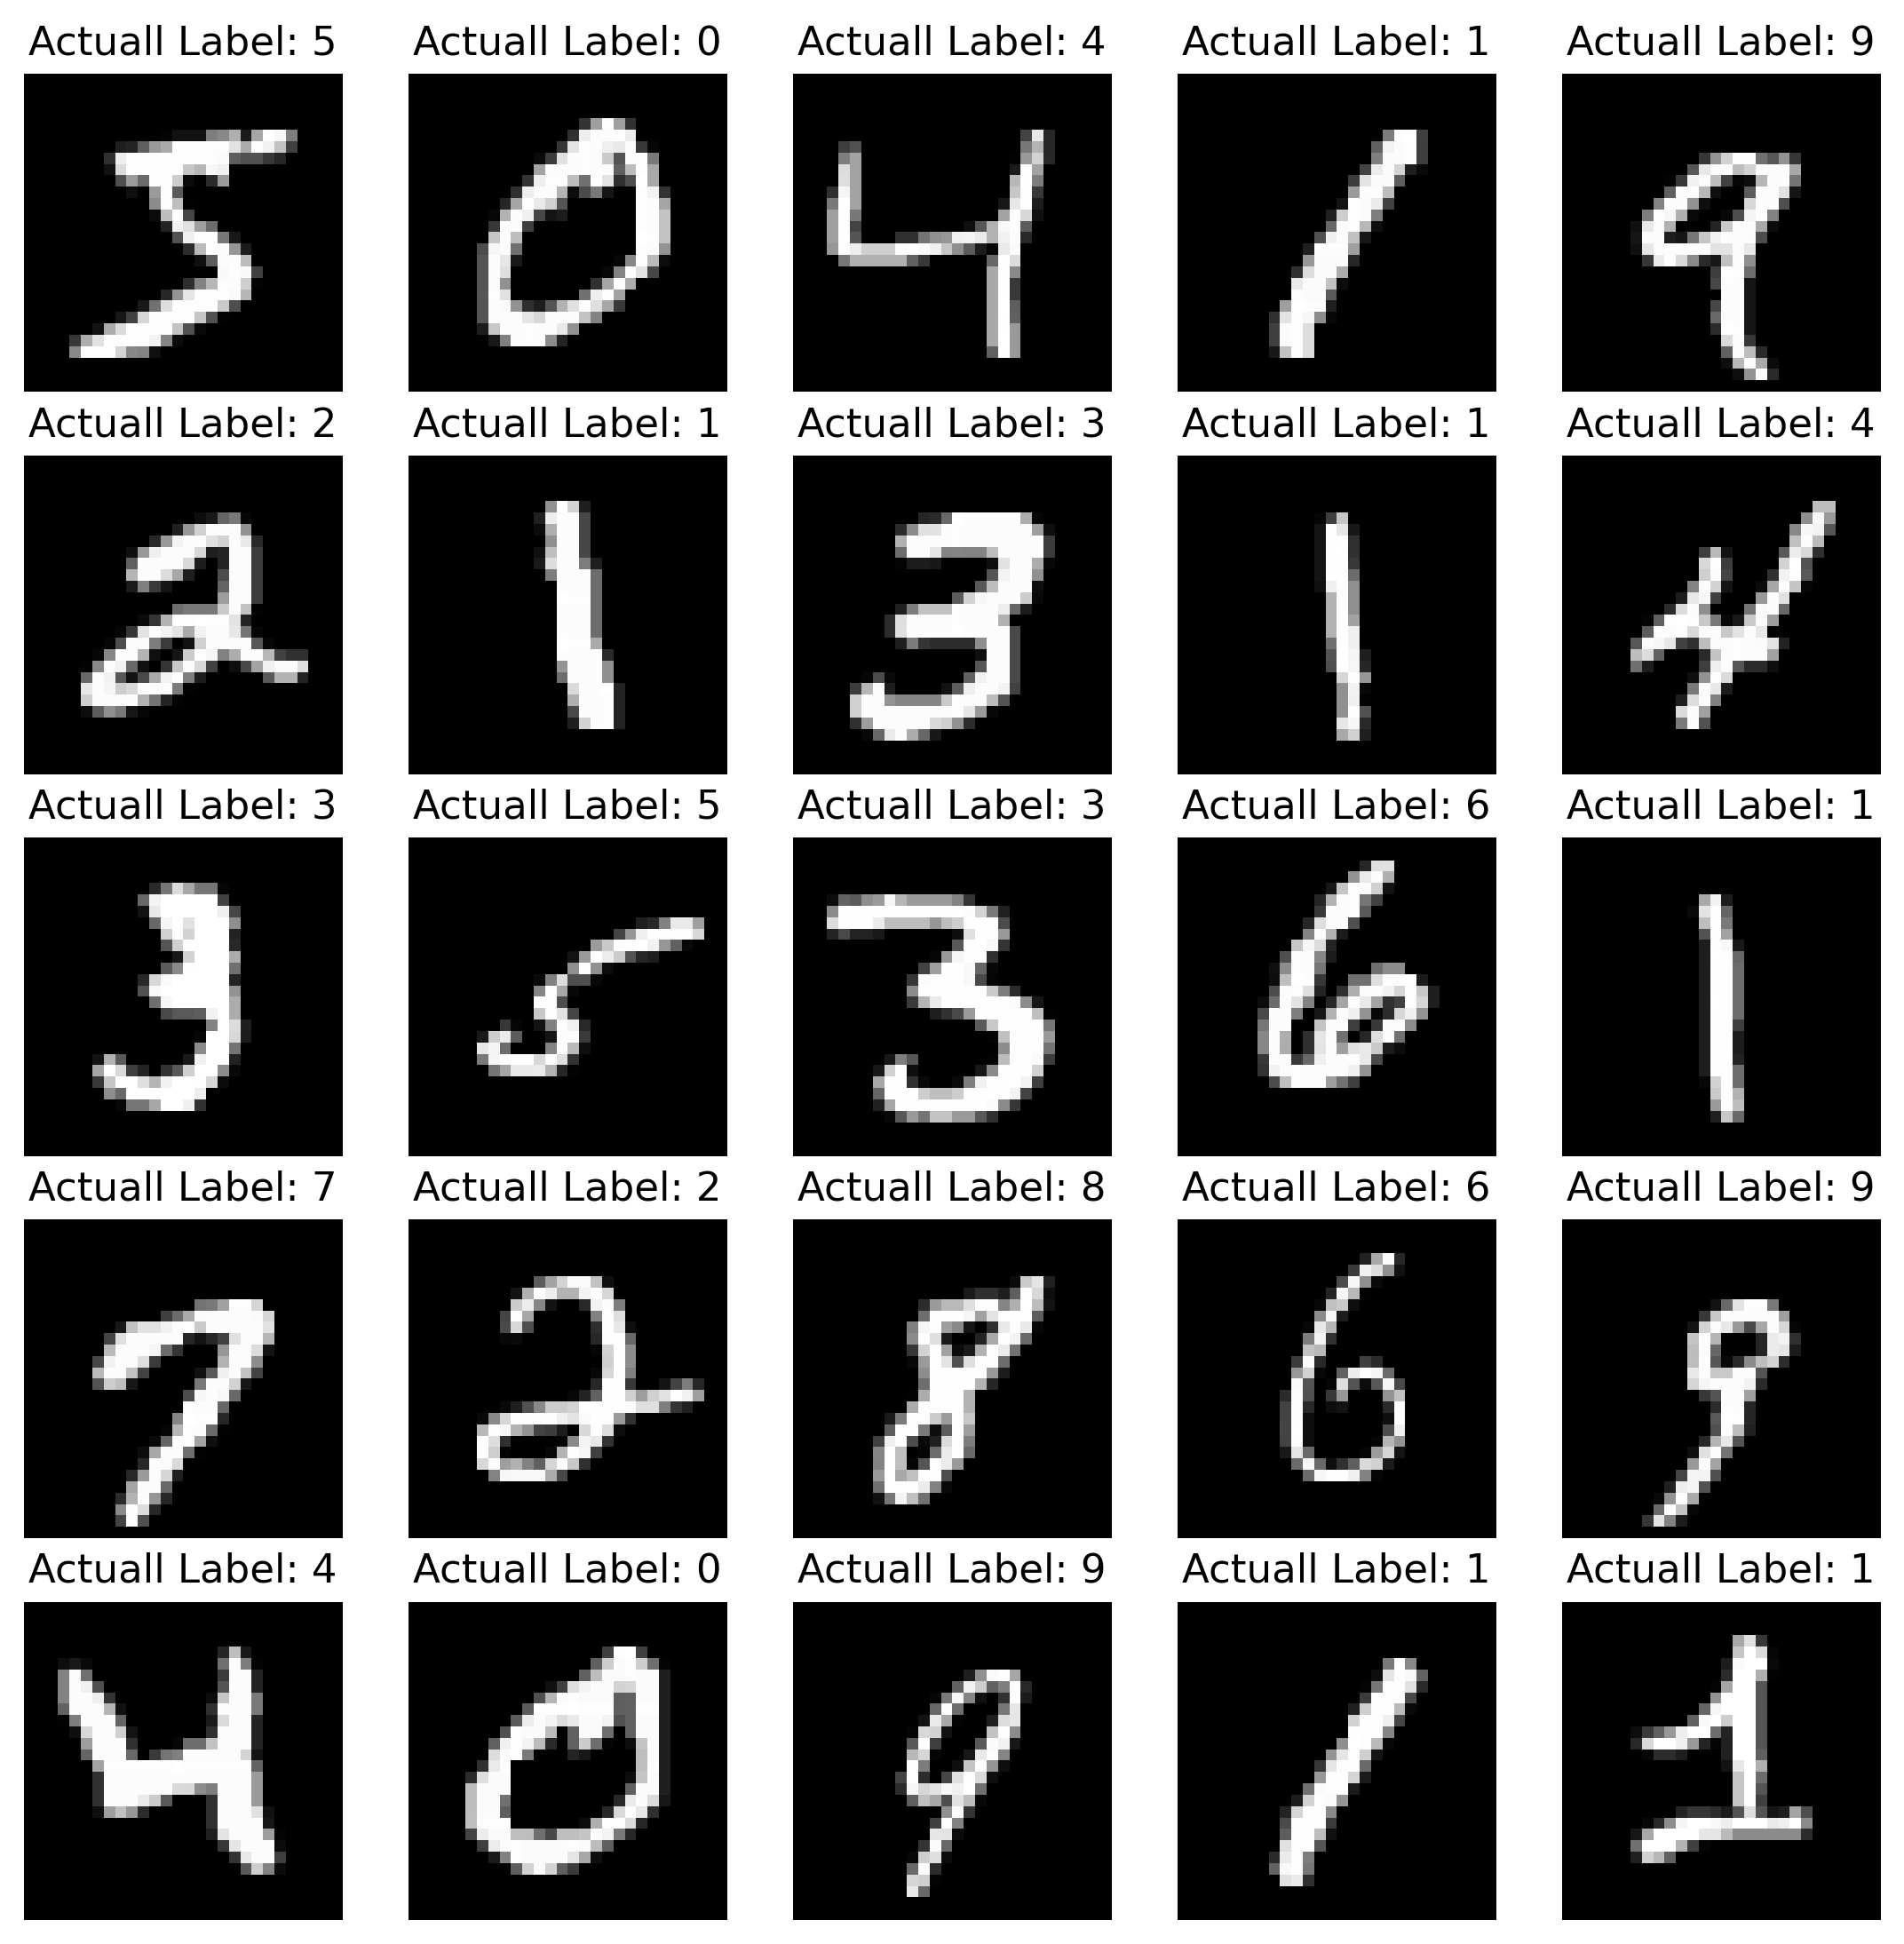

In [5]:
# Data and Labels
plt.figure(figsize=(10,10), dpi=270)
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Actuall Label: {train_labels[i]}")
    plt.axis('off')
    
plt.show()

In [6]:
# Defining neccesarry functions needed for the model evaluation

def plot_training_history_with_plotly(history):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['accuracy']) + 1)),
        y=history.history['accuracy'],
        mode='lines',
        name='Train Accuracy'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_accuracy']) + 1)),
        y=history.history['val_accuracy'],
        mode='lines',
        name='Validation Accuracy'
    ))

    fig.update_layout(
        title='Model Accuracy',
        xaxis_title='Epoch',
        yaxis_title='Accuracy',
        legend=dict(x=0, y=1),
    )

    fig.show()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['loss']) + 1)),
        y=history.history['loss'],
        mode='lines',
        name='Train Loss'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_loss']) + 1)),
        y=history.history['val_loss'],
        mode='lines',
        name='Validation Loss'
    ))

    fig.update_layout(
        title='Model Loss',
        xaxis_title='Epoch',
        yaxis_title='Loss',
        legend=dict(x=0, y=1),
    )

    fig.show()

In [7]:
# Split into traingin data and testing data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# Modelling
lanet5_model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

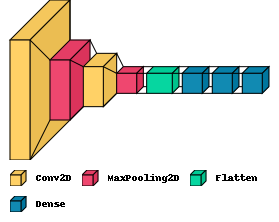

In [9]:
visualkeras.layered_view(lanet5_model, scale_xy=5, legend=True)

In [10]:
lanet5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lanet5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [11]:
lanet5_history = lanet5_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 21s 19ms/step - loss: 0.2578 - accuracy: 0.9219 - val_loss: 0.0893 - val_accuracy: 0.9709
Epoch 2/10
938/938 [==============================] - 22s 23ms/step - loss: 0.0801 - accuracy: 0.9754 - val_loss: 0.0511 - val_accuracy: 0.9841
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0497 - val_accuracy: 0.9839
Epoch 4/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0483 - val_accuracy: 0.9836
Epoch 5/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0430 - val_accuracy: 0.9858
Epoch 6/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 7/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0366 - val_accuracy:

In [12]:
# Test loss
test_loss, test_acc = lanet5_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0421 - accuracy: 0.9880
Test accuracy: 0.9879999756813049


In [13]:
plot_training_history_with_plotly(lanet5_history)

In [14]:
# Adding a second layer
model_2 = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Dropout(0.25),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Dropout(0.25),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dropout(0.5),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

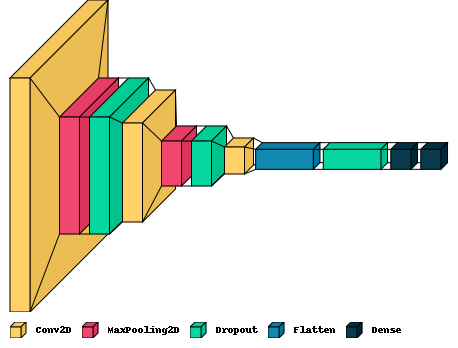

In [15]:
visualkeras.layered_view(model_2, scale_xy=9, legend=True)

In [16]:
# Optimizing with the Adam optimizer provided by the tensorflow library
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [17]:
model_2_history = model_2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 46s 47ms/step - loss: 0.3060 - accuracy: 0.9031 - val_loss: 0.0493 - val_accuracy: 0.9839
Epoch 2/10
938/938 [==============================] - 53s 56ms/step - loss: 0.0975 - accuracy: 0.9696 - val_loss: 0.0346 - val_accuracy: 0.9886
Epoch 3/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0732 - accuracy: 0.9768 - val_loss: 0.0314 - val_accuracy: 0.9886
Epoch 4/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0626 - accuracy: 0.9808 - val_loss: 0.0269 - val_accuracy: 0.9914
Epoch 5/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0261 - val_accuracy: 0.9911
Epoch 6/10
938/938 [==============================] - 58s 62ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.0249 - val_accuracy: 0.9917
Epoch 7/10
938/938 [==============================] - 67s 71ms/step - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.0208 - val_accuracy:

In [18]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0207 - accuracy: 0.9928
Test accuracy: 0.9927999973297119


In [ ]:
plot_training_history_with_plotly(model_2_history)

In [21]:
predictions = model_2.predict(test_images)

313/313 [==============================] - 2s 7ms/step


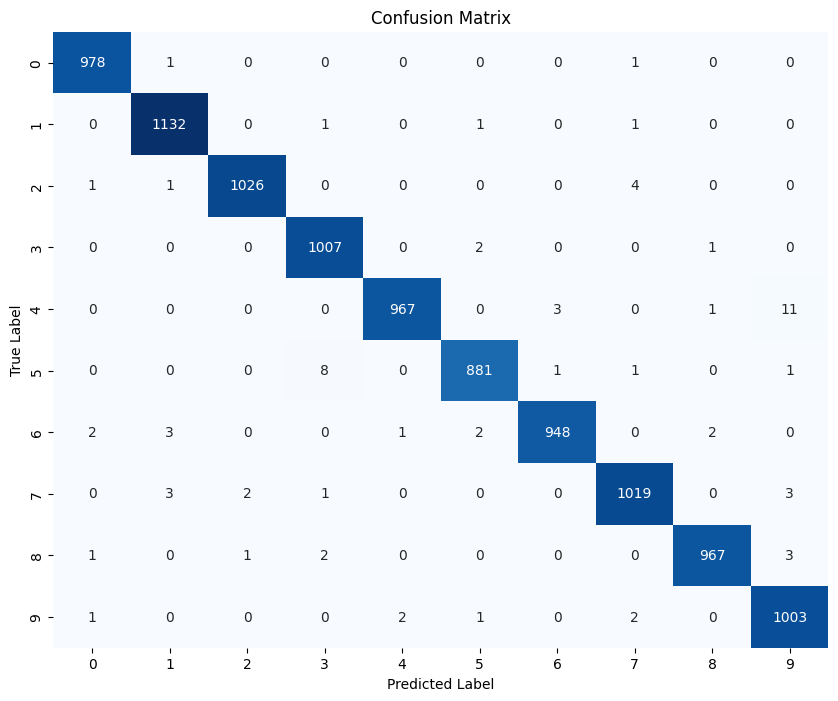


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('\nClassification Report:\n', classification_report(true_labels, predicted_labels))

NameError: name 'predictions' is not defined

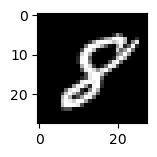

In [27]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i in range(25):
    random_index = random.randint(0, test_images.shape[0] - 1)

    # Display the test image
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {np.argmax(test_labels[random_index])}\nPredicted: {predictions[random_index].argmax()}")
    plt.axis('off')

plt.show()
